In [2]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')


Saving fake_reg.xls to fake_reg (1).xls
User uploaded file "fake_reg (1).xls" with length 55914 bytes


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df =pd.read_csv('/content/fake_reg.xls')

In [9]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


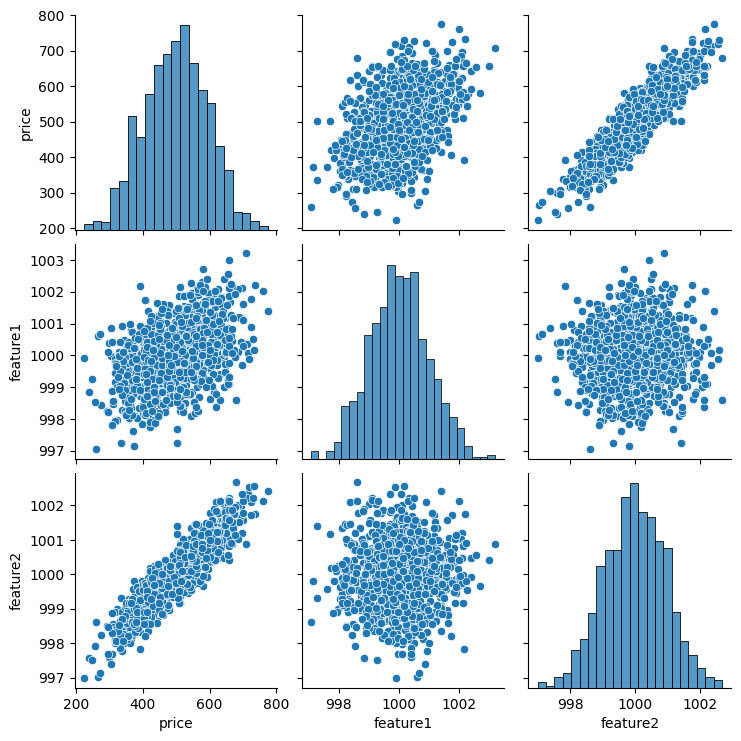

In [10]:
sns.pairplot(df)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df[['feature1','feature2']].values

In [13]:
y = df[['price']].values

In [47]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

data =1000, train = 70% , test = 30%

In [16]:
X_train.shape

(700, 2)

In [18]:
X_test.shape

(300, 2)

Training network = always normalize data .

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
#help(MinMaxScaler) #read

In [22]:
#make instance

scaler = MinMaxScaler()

In [23]:
scaler.fit(X_train)

MinMaxScaler()

Tranform trainiing data


In [24]:
X_train = scaler.transform(X_train)


In [25]:
X_test = scaler.transform(X_test)

In [45]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [48]:
#quick sheck
X_train.max()

np.float64(1.0)

In [49]:
X_train.min()

np.float64(0.0)

Creat Model


In [31]:
!pip install tensorflow --quiet


In [32]:
!pip install keras --quiet

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

read:OPTIMIZER AND LOSS

In [54]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))#important becuse we are trying to pred price that is 1 unit

#note next part read KEras notebook for OPTIMIZER AND LOSS

model.compile(optimizer='rmsprop',loss ='mse') #mean-sq-error (regression)



In [58]:
history_obj = model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 257246.3906   
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 251951.2656 
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 258980.5781 
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 257134.2969 
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 252309.3281 
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 258117.3125 
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256501.6406 
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254413.4531 
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 253921.7344 
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 253931.8281 
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255803.0469 
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 263427.8125 
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 260027.0938 
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

In [62]:
loss_df = pd.DataFrame(history_obj.history)

<Axes: >

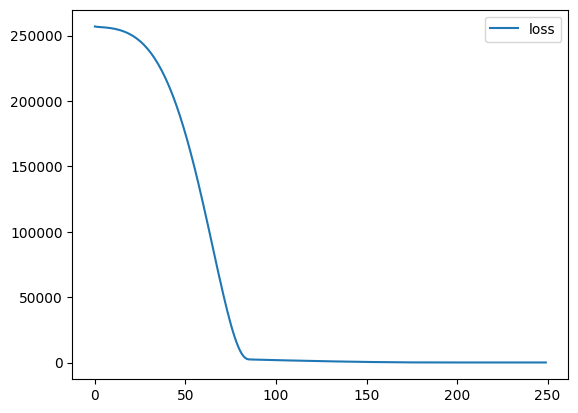

In [60]:
loss_df.plot()

In [61]:
#check out it operform on new dat -- test_data of y

model.evaluate(X_test,y_test,verbose=0)

26.229164123535156

In [63]:
test_predictions =model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [64]:
test_predictions

array([[406.07004],
       [624.815  ],
       [593.34125],
       [573.3732 ],
       [367.28613],
       [580.35077],
       [516.05963],
       [460.01917],
       [550.3405 ],
       [448.40686],
       [613.0352 ],
       [550.0749 ],
       [419.90988],
       [409.65292],
       [652.60425],
       [438.15884],
       [509.48584],
       [661.2701 ],
       [663.9393 ],
       [566.6907 ],
       [334.83505],
       [445.70264],
       [383.24652],
       [379.47626],
       [567.74005],
       [611.8265 ],
       [533.45624],
       [428.69418],
       [656.77875],
       [414.891  ],
       [443.51038],
       [486.08972],
       [439.27185],
       [683.246  ],
       [425.5976 ],
       [418.48517],
       [502.95187],
       [551.58734],
       [510.73334],
       [396.09335],
       [619.8609 ],
       [417.44144],
       [605.6861 ],
       [446.84924],
       [502.9887 ],
       [582.92194],
       [670.3986 ],
       [491.3856 ],
       [319.1733 ],
       [486.3876 ],


In [65]:
#comare with Y_test vs predicted

In [66]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [67]:
#test pred

In [68]:
pred_df = pd.DataFrame(y_test,columns=['TEst True Y'])

In [70]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [73]:
pred_df.columns = ['Test True Y','Model Predictions']

In [74]:
pred_df

,Test True Y,Model Predictions
0,402.296319,406.070038
1,624.156198,624.815002
2,582.455066,593.341248
3,578.588606,573.373230
4,371.224104,367.286133
...,...,...
295,525.704657,530.095825
296,502.909473,516.323853
297,612.727910,610.898254
298,417.569725,417.772614


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

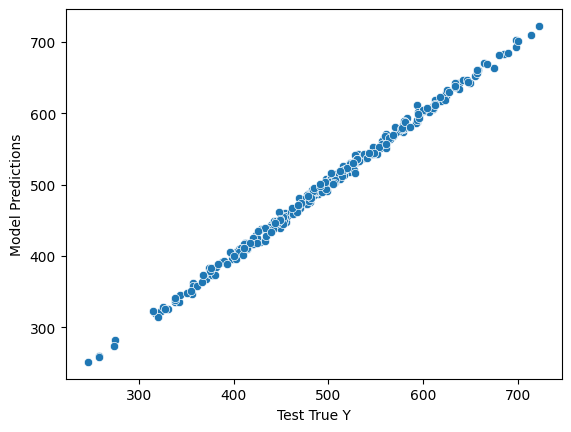

In [77]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [79]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [80]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.145775233318388

In [82]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [83]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

5.1214416581923015

In [84]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.145775233318388

In [85]:
new_gem =[[998,1000]]

In [86]:
new_gem =scaler.transform(new_gem)

In [87]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[420.47827]], dtype=float32)

In [88]:
from tensorflow.keras.models import load_model

In [92]:
model.save('my_gem_model.keras')

In [93]:
later_model = load_model('my_gem_model.keras')

In [94]:
later_model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


array([[420.47827]], dtype=float32)